In [1104]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib widget

# df['Datetime'] = pd.to_datetime(df['Datetime'])
# df['Datetime'] = df['Datetime'].apply(lambda x: x.replace(year = 2007))

# Agent actions from Memory

In [1070]:

# memory_csv = pd.read_csv(r"W:\Insync\GDrive\Main\TU Delft\Thesis\DRL runs 04\Building-InsuBASE-MassBASE\RL24hAllRNN\agent memory.csv")
memory_csv = pd.read_csv(r"W:\Insync\GDrive\Main\TU Delft\Thesis\DRL runs 07\Building-InsuBASE-MassBASE\RL24hAllRNN\agent memory.csv")
# memory_csv = pd.read_csv(r"W:\Insync\GDrive\Main\TU Delft\Thesis\DRL runs 04\Building-InsuBASE-MassBASE\RL04hAllRNN\agent memory.csv")
# memory_csv = pd.read_csv(r"W:\Insync\GDrive\Main\TU Delft\Thesis\DRL runs 04\Building-InsuBASE-MassBASE\RL04hNoSolarRNN\agent memory.csv")
# memory_csv = pd.read_csv(r"W:\Insync\GDrive\Main\TU Delft\Thesis\DRL runs\Building-InsuUP-MassUP\RL04hFlatInput\agent memory.csv")

In [1071]:
templist = str(memory_csv[8730:8731]['state_prev'].values).replace('[','').replace(']', '').replace("'","").replace('\\n',' ')
# templist = str(memory_csv[8730:8731]['state_prev'].values)
templist = templist.split()
templist
templist = [float(x) for x in templist]
templist

[-1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -0.236,
 -0.248,
 -0.248,
 -0.256,
 -0.26,
 -0.26,
 -0.256,
 -0.256,
 -0.256,
 -0.24,
 -0.232,
 -0.244,
 -0.24,
 -0.24,
 -0.228,
 -0.228,
 -0.224,
 -0.22,
 -0.204,
 -0.204,
 -0.216,
 -0.208,
 -0.212,
 -0.192,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -0.998,
 -0.998,
 -1.0,
 -0.998,
 -0.998,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -0.998,
 -0.986,
 -0.95,
 -0.914,
 -0.918,
 -0.938,
 -0.962,
 -0.988,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,


7.5
['[', '0', ',', ' ', '0', ',', ' ', '0', ',', ' ', '0', ',', ' ', '0', ',', ' ', '0', ',', ' ', '0', ',', ' ', '0', ',', ' ', '0', ',', ' ', '0', ',', ' ', '1', ']']
['0', ',', ' ', '0', ',', ' ', '0', ',', ' ', '0', ',', ' ', '0', ',', ' ', '0', ',', ' ', '0', ',', ' ', '0', ',', ' ', '0', ',', ' ', '0', ',', ' ', '1', ']']
[4.0, 10.0, 6.0, 4.0, 9.0, 10.0, 3.0, 4.0, 6.0, 2.0, 4.0, 10.0, 9.0, 9.0, 7.0, 5.0, 8.0, 7.0, 7.0, 4.0, 6.0, 4.0, 9.0, 0.0, 7.0, 7.0, 1.0, 9.0, 9.0, 7.0, 5.0, 7.0, 1.0, 5.0, 10.0, 9.0, 1.0, 7.0, 7.0, 0.0, 7.0, 2.0, 7.0, 2.0, 7.0, 6.0, 6.0, 6.0, 10.0, 0.0, 0.0, 6.0, 8.0, 3.0, 3.0, 9.0, 6.0, 6.0, 2.0, 5.0, 4.0, 3.0, 7.0, 4.0, 7.0, 1.0, 2.0, 0.0, 7.0, 7.0, 8.0, 7.0, 8.0, 8.0, 4.0, 8.0, 8.0, 8.0, 0.0, 8.0, 5.0, 5.0, 6.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 7.0, 9.0, 0.0, 9.0, 8.0, 9.0, 10.0, 10.0, 6.0, 8.0, 0.0, 7.0, 2.0, 0.0, 10.0, 10.0, 9.0, 4.0, 8.0, 9.0, 8.0, 3.0, 0.0, 1.0, 7.0, 7.0, 9.0, 3.0, 7.0, 7.0, 9.0, 1.0, 3.0, 3.0, 2.0, 10.0, 6.0, 6.0, 1.0, 1.0, 8.0, 6.0

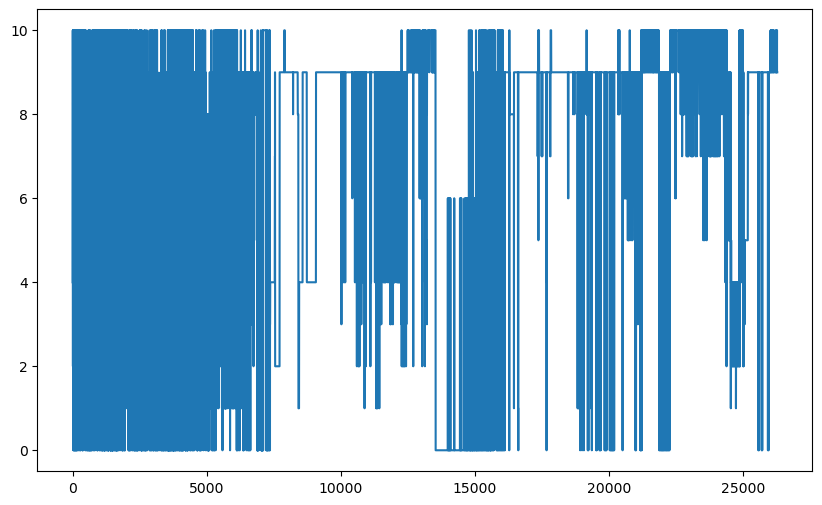

In [1072]:
memory_csv.head()
print(list(memory_csv.at[1, 'action'])[1:].index('1') / 4)
print(list(memory_csv.at[1, 'action']))
print(list(memory_csv.at[1, 'action'])[1:])
# print([int(each) for each in list(memory_csv.at[1, 'action']) if int(each).dtype == int])
action_index = [list(memory_csv.at[x, 'action'])[1:].index('1') / 3 for x in range(memory_csv['action'].count())]
print(action_index)
rewards = memory_csv['next_reward'].convert_dtypes()

# y2 = memory_csv['next_reward']
y1 = action_index
x = [x for x in range(len(y1))]

plt.figure(figsize=(10,6))
plt.plot(x,y1)
# plt.plot(x,y2)

# plt.show()

# Agent Loss

In [1073]:
lossdf4 = pd.read_csv(r"W:\Insync\GDrive\Main\TU Delft\Thesis\DRL runs 04\Building-InsuBASE-MassBASE\RL24hAllRNN\agent loss.csv")
lossdf5 = pd.read_csv(r"W:\Insync\GDrive\Main\TU Delft\Thesis\DRL runs 05\Building-InsuBASE-MassBASE\RL24hAllRNN ExpRep RNN\agent loss.csv")
# lossdf5noexp = pd.read_csv(r"W:\Insync\GDrive\Main\TU Delft\Thesis\DRL runs 05\Building-InsuBASE-MassBASE\RL24hAllRNN\agent loss.csv")
lossdf7 = pd.read_csv(r"W:\Insync\GDrive\Main\TU Delft\Thesis\DRL runs 07\Building-InsuBASE-MassBASE\RL24hAllRNN\agent loss.csv")
# lossdf = pd.read_csv(r"W:\Insync\GDrive\Main\TU Delft\Thesis\DRL runs 04\Building-InsuBASE-MassBASE\RL04hAllRNN\agent loss.csv")
# lossdf = pd.read_csv(r"W:\Insync\GDrive\Main\TU Delft\Thesis\DRL runs 04\Building-InsuBASE-MassBASE\RL24hNoSolarRNN\agent loss.csv")
# lossdf = pd.read_csv(r"W:\Insync\GDrive\Main\TU Delft\Thesis\DRL runs 04\Building-InsuBASE-MassBASE\RL04hNoSolarRNN\agent loss.csv")
# lossdf = pd.read_csv(r"W:\Insync\GDrive\Main\TU Delft\Thesis\DRL runs 04\Building-InsuBASE-MassBASE\RLBaseNoForesight\agent loss.csv")
# lossdf = pd.read_csv(r"W:\Insync\GDrive\Main\TU Delft\Thesis\DRL runs 04\Building-InsuBASE-MassBASE\RL04hFlatInput\agent loss.csv")
# lossdf = pd.read_csv(r"W:\Insync\GDrive\Main\TU Delft\Thesis\DRL runs\Building-InsuUP-MassUP\RL04hFlatInput\agent loss.csv")

<Axes: >

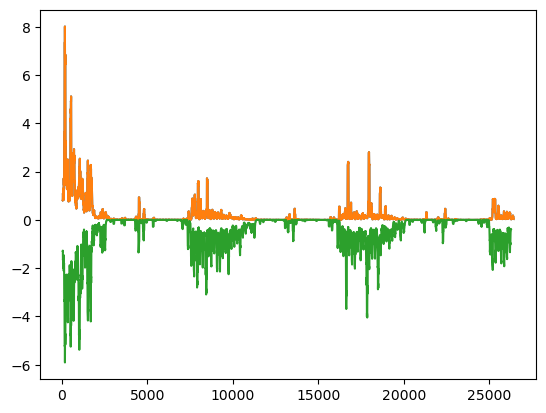

In [1074]:
rollloss4 = lossdf7['0'] * 1
rollloss4.rolling(50).mean().plot()
# memory_csv['next_reward'].rolling(50).mean().plot()
# # repeat
rollloss5 = lossdf7['0'] * 1
rollloss5.rolling(50).mean().plot()
memory_csv['next_reward'].rolling(50).mean().plot()
# rollloss.plot()
# rolling(702, min_periods=1, center=True).mean()

<Axes: >

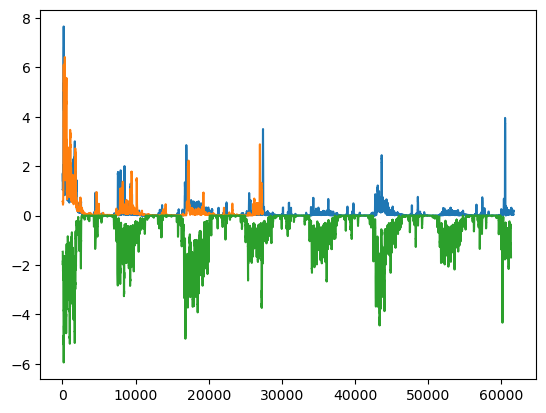

In [956]:
rollloss4 = lossdf5noexp['0'] * 1
rollloss4.rolling(50).mean().plot()
# memory_csv['next_reward'].rolling(50).mean().plot()
# # repeat
rollloss5 = lossdf5['0'] * 1
rollloss5.rolling(50).mean().plot()
memory_csv['next_reward'].rolling(50).mean().plot()
# rollloss.plot()
# rolling(702, min_periods=1, center=True).mean()

# CSV

In [1061]:
dfcsvbase = pd.read_csv(r"W:\Insync\GDrive\Main\TU Delft\Thesis\DRL runs\Building-InsuBASE-MassBASE\EPBaseline\out\eplusout.csv")
dfcsv = pd.read_csv(r"W:\Insync\GDrive\Main\TU Delft\Thesis\DRL runs 03\Building-InsuBASE-MassBASE\RL24hAllRNN\out\eplusout.csv")
dfcsv4rnn24 = pd.read_csv(r"W:\Insync\GDrive\Main\TU Delft\Thesis\DRL runs 04\Building-InsuBASE-MassBASE\RL24hAllRNN\out\eplusout.csv")
# dfcsv5rnn24 = pd.read_csv(r"W:\Insync\GDrive\Main\TU Delft\Thesis\DRL runs 05\Building-InsuBASE-MassBASE\RL24hAllRNN\out\eplusout.csv")
dfcsv7rnn24 = pd.read_csv(r"W:\Insync\GDrive\Main\TU Delft\Thesis\DRL runs 07\Building-InsuBASE-MassBASE\RL24hAllRNN\out\eplusout.csv")
# dfcsv4rnn24u = pd.read_csv(r"W:\Insync\GDrive\Main\TU Delft\Thesis\DRL runs 04\Building-InsuBASE-MassDW\RL24hAllRNN\out\eplusout.csv")
# dfcsv4rnn24d = pd.read_csv(r"W:\Insync\GDrive\Main\TU Delft\Thesis\DRL runs 04\Building-InsuBASE-MassUP\RL24hAllRNN\out\eplusout.csv")
# dfcsv4rnn24Nosol = pd.read_csv(r"W:\Insync\GDrive\Main\TU Delft\Thesis\DRL runs 04\Building-InsuBASE-MassBASE\RL24hNoSolarRNN\out\eplusout.csv")
# dfcsv4rnn04 = pd.read_csv(r"W:\Insync\GDrive\Main\TU Delft\Thesis\DRL runs 04\Building-InsuBASE-MassBASE\RL04hAllRNN\out\eplusout.csv")
# dfcsv4rnn04Nosol = pd.read_csv(r"W:\Insync\GDrive\Main\TU Delft\Thesis\DRL runs 04\Building-InsuBASE-MassBASE\RL04hNoSolarRNN\out\eplusout.csv")
# dfcsvnoforesight = pd.read_csv(r"W:\Insync\GDrive\Main\TU Delft\Thesis\DRL runs 04\Building-InsuBASE-MassBASE\RLBaseNoForesight\out\eplusout.csv")
# dfcsvflatinputs = pd.read_csv(r"W:\Insync\GDrive\Main\TU Delft\Thesis\DRL runs 04\Building-InsuBASE-MassBASE\RL04hFlatInput\out\eplusout.csv")


['FACE_0FF19402:Surface Heat Storage Rate per Area [W/m2](Hourly)', 'FACE_0FF19402:Surface Heat Storage Energy [J](Hourly)', 'FACE_11065575:Surface Heat Storage Rate per Area [W/m2](Hourly)', 'FACE_11065575:Surface Heat Storage Energy [J](Hourly)', 'FACE_18A1FA23:Surface Heat Storage Rate per Area [W/m2](Hourly)', 'FACE_18A1FA23:Surface Heat Storage Energy [J](Hourly)', 'FACE_313C9FB7:Surface Heat Storage Rate per Area [W/m2](Hourly)', 'FACE_313C9FB7:Surface Heat Storage Energy [J](Hourly)', 'FACE_333BAA5F:Surface Heat Storage Rate per Area [W/m2](Hourly)', 'FACE_333BAA5F:Surface Heat Storage Energy [J](Hourly)', 'FACE_6554E6BE:Surface Heat Storage Rate per Area [W/m2](Hourly)', 'FACE_6554E6BE:Surface Heat Storage Energy [J](Hourly)', 'FACE_67377BDA:Surface Heat Storage Rate per Area [W/m2](Hourly)', 'FACE_67377BDA:Surface Heat Storage Energy [J](Hourly)', 'FACE_AC6A3768:Surface Heat Storage Rate per Area [W/m2](Hourly)', 'FACE_AC6A3768:Surface Heat Storage Energy [J](Hourly)', 'FACE_C

<Axes: >

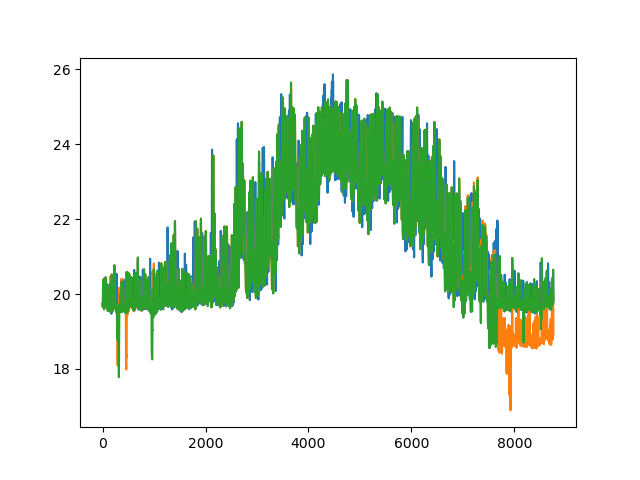

In [1105]:
storage = [x for x in list(dfcsv.columns) if 'Storage' in x]
print(storage)
# dfcsv[storage[-2:-1]].plot()
# dfcsv['Z1_GROUND_FLOOR:Zone Operative Temperature [C](Hourly)'][:].plot()
dfcsvbase['Z1_GROUND_FLOOR:Zone Operative Temperature [C](Hourly)'][:].plot()
dfcsv4rnn24['Z1_GROUND_FLOOR:Zone Operative Temperature [C](Hourly)'][:].plot()
# dfcsv5rnn24['Z1_GROUND_FLOOR:Zone Operative Temperature [C](Hourly)'][:].plot()
dfcsv7rnn24['Z1_GROUND_FLOOR:Zone Operative Temperature [C](Hourly)'][:].plot()
# dfcsv4rnn24u['Z1_GROUND_FLOOR:Zone Operative Temperature [C](Hourly)'][:].plot()
# dfcsv4rnn24d['Z1_GROUND_FLOOR:Zone Operative Temperature [C](Hourly)'][:].plot()
# dfcsv4rnn04['Z1_GROUND_FLOOR:Zone Operative Temperature [C](Hourly)'][:].plot()
# dfcsv4rnn24Nosol['Z1_GROUND_FLOOR:Zone Operative Temperature [C](Hourly)'][:].plot()
# dfcsv4rnn04Nosol['Z1_GROUND_FLOOR:Zone Operative Temperature [C](Hourly)'][:].plot()
# dfcsvnoforesight['Z1_GROUND_FLOOR:Zone Operative Temperature [C](Hourly)'][:].plot()
# dfcsvflatinputs['Z1_GROUND_FLOOR:Zone Operative Temperature [C](Hourly)'][:].plot()

0     01/01  01:00:00
1     01/01  02:00:00
2     01/01  03:00:00
3     01/01  04:00:00
4     01/01  05:00:00
Name: Date/Time, dtype: object


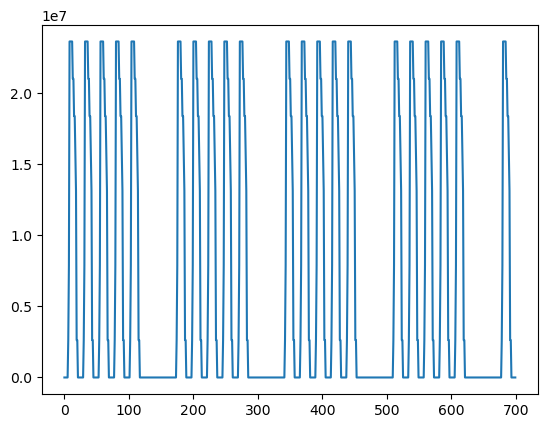

In [491]:
# dfcsv['Z1_GROUND_FLOOR IDEAL LOADS AIR SYSTEM:Zone Ideal Loads Supply Air Total Heating Energy [J](Hourly)'].dropna().plot()

# dfcsv['Z1_GROUND_FLOOR IDEAL LOADS AIR SYSTEM:Zone Ideal Loads Zone Total Heating Energy [J](Hourly)'].dropna().rolling(720).mean().plot()
# dfcsv['Z2_FIRST_FLOOR IDEAL LOADS AIR SYSTEM:Zone Ideal Loads Zone Total Heating Energy [J](Hourly)'].dropna().rolling(720).mean().plot()

# newdf = dfcsv['Z1_GROUND_FLOOR IDEAL LOADS AIR SYSTEM:Zone Ideal Loads Supply Air Total Heating Energy [J](Hourly)'].dropna() - dfcsv['Z1_GROUND_FLOOR IDEAL LOADS AIR SYSTEM:Zone Ideal Loads Zone Total Heating Energy [J](Hourly)'].dropna()
# dfcsv['Whole Building:Facility Total Purchased Electricity Energy [J](Hourly)'].dropna().plot()
# newdf.plot()
dfcsv['Z1_GROUND_FLOOR:Zone Lights Electricity Energy [J](Hourly)'][:700].plot()
print(dfcsv['Date/Time'].head())
# dfcsv['Z1_GROUND_FLOOR IDEAL LOADS AIR SYSTEM:Zone Ideal Loads Zone Total Heating Energy [J](Hourly)'][0:600].plot()
# dfcsv['Z1_GROUND_FLOOR:Zone Operative Temperature [C](Hourly)'][720:1000].plot()

# 'Z1_GROUND_FLOOR IDEAL LOADS AIR SYSTEM:Zone Ideal Loads Supply Air Total Heating Energy [J](Hourly)'

# 'Z1_GROUND_FLOOR IDEAL LOADS AIR SYSTEM:Zone Ideal Loads Zone Total Heating Energy [J](Hourly)'



<Axes: >

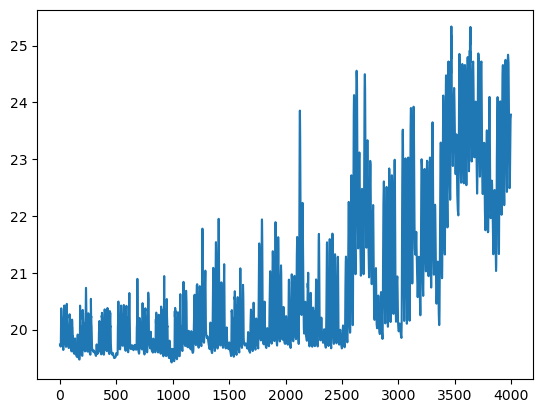

In [495]:
dfcsv['Z1_GROUND_FLOOR:Zone Operative Temperature [C](Hourly)'][:4000].plot()
# dfcsv['Z1_GROUND_FLOOR IDEAL LOADS AIR SYSTEM:Zone Ideal Loads Supply Air Total Heating Energy [J](Hourly)'][:720].plot()
# dfcsv['Z1_GROUND_FLOOR:Zone Mean Air Temperature [C](Hourly)'].plot()
# dfcsv['Z2_FIRST_FLOOR:Zone Operative Temperature [C](Hourly)'].plot()

In [14]:
totalmj = float(MJ_m2) * 2480
totaljoules = totalmj * 1000000

z1sum = dfcsv['Z1_GROUND_FLOOR IDEAL LOADS AIR SYSTEM:Zone Ideal Loads Supply Air Total Heating Energy [J](Hourly)'].dropna().sum()
z2sum = dfcsv['Z2_FIRST_FLOOR IDEAL LOADS AIR SYSTEM:Zone Ideal Loads Supply Air Total Heating Energy [J](Hourly)'].dropna().sum()

print(totalmj)
print(totaljoules)
print(z1sum)
print(z2sum)
print((z2sum + z1sum) / 1000000000, '  total')

print('\nsame as above, for ease')
print(MJ_m2)
print(EUI_kWh_m2)


280686.4
280686400000.0
39437110929.03003
13518462974.72491
52.955573903754946   total

same as above, for ease
113.18
31.438880086000005


# Thermal Mass CSV

In [ ]:
masscsv = pd.read_csv(r"W:\Insync\GDrive\Main\TU Delft\Thesis\DRL runs 03\Building-InsuBASE-MassUP\RL24hAllRNN\out\eplusout.csv")
# also check high mass building

In [ ]:
print( max((masscsv[[x for x in masscsv.columns if 'Storage Rate' in x and 'MASS' in x]].max())) )
print( min((masscsv[[x for x in masscsv.columns if 'Storage Rate' in x and 'MASS' in x]].min())) )

print( max((masscsv[[x for x in masscsv.columns if 'Storage Energy' in x and 'MASS' in x]].max())) )
print( min((masscsv[[x for x in masscsv.columns if 'Storage Energy' in x and 'MASS' in x]].min())) )
# Output:Variable,*,Surface Heat Storage Rate per Area,hourly; !- Zone Average [W/m2]
# Output:Variable,*,Surface Heat Storage Energy,hourly; !- Zone Sum [J]

18.25873000011097
-20.78086296036213
27358385.26436211
-40510442.440355055


In [1056]:
masscsv[[x for x in masscsv.columns if 'Storage' in x and 'Z' in x]]

,INT_WALLS_MASS_GROUND::Z1_GROUND_FLOOR_SPACE:Surface Heat Storage Rate per Area [W/m2](Hourly),INT_WALLS_MASS_GROUND::Z1_GROUND_FLOOR_SPACE:Surface Heat Storage Energy [J](Hourly),STAIRS_MASS::Z1_GROUND_FLOOR_SPACE:Surface Heat Storage Rate per Area [W/m2](Hourly),STAIRS_MASS::Z1_GROUND_FLOOR_SPACE:Surface Heat Storage Energy [J](Hourly),INT_WALLS_MASS_FIRST::Z2_FIRST_FLOOR_SPACE:Surface Heat Storage Rate per Area [W/m2](Hourly),INT_WALLS_MASS_FIRST::Z2_FIRST_FLOOR_SPACE:Surface Heat Storage Energy [J](Hourly)
0,-0.282968,-1.262150e+06,-0.671238,-72493.720875,-0.272787,-4.811968e+05
1,-0.358668,-1.599803e+06,-0.885942,-95681.704489,-0.346717,-6.116087e+05
2,-0.333918,-1.489407e+06,-0.902885,-97511.527810,-0.324828,-5.729965e+05
3,-0.295659,-1.318758e+06,-0.849205,-91714.154149,-0.288986,-5.097717e+05
4,-0.260139,-1.160324e+06,-0.770864,-83253.364445,-0.255133,-4.500555e+05
...,...,...,...,...,...,...
8755,-0.951804,-4.245427e+06,-2.837888,-306491.885807,-0.974418,-1.718873e+06
8756,-1.039220,-4.635338e+06,-3.039593,-328276.067491,-1.053068,-1.857612e+06
8757,-1.000950,-4.464638e+06,-2.954108,-319043.715588,-1.021363,-1.801685e+06
8758,-0.981545,-4.378084e+06,-2.908387,-314105.821834,-1.009634,-1.780995e+06


# Meter CSV

In [957]:
# dfmeter = pd.read_csv(r"C:\Users\sebas\Documents\GitHub\ClimAIte\out\eplusmtr.csv")
# dfmeter = pd.read_csv(r"W:\Insync\GDrive\Main\TU Delft\Thesis\DRL runs 04\Building-InsuBASE-MassBASE\EPBaseline\out\eplusmtr.csv")
# dfmeter = pd.read_csv(r"W:\Insync\GDrive\Main\TU Delft\Thesis\DRL runs 04\Building-InsuBASE-MassBASE\RL24hAllRNN\out\eplusmtr.csv")
dfmeter = pd.read_csv(r"W:\Insync\GDrive\Main\TU Delft\Thesis\DRL runs 05\Building-InsuBASE-MassBASE\RL24hAllRNN\out\eplusmtr.csv")
# dfmeter = pd.read_csv(r"W:\Insync\GDrive\Main\TU Delft\Thesis\DRL runs 04\Building-InsuBASE-MassBASE\RL04hAllRNN\out\eplusmtr.csv")
# dfmeter = pd.read_csv(r"W:\Insync\GDrive\Main\TU Delft\Thesis\DRL runs 04\Building-InsuBASE-MassBASE\RL24hNoSolarRNN\out\eplusmtr.csv")
# dfmeter = pd.read_csv(r"W:\Insync\GDrive\Main\TU Delft\Thesis\DRL runs 04\Building-InsuBASE-MassBASE\RL04hNoSolarRNN\out\eplusmtr.csv")
# dfmeter = pd.read_csv(r"W:\Insync\GDrive\Main\TU Delft\Thesis\DRL runs 04\Building-InsuBASE-MassBASE\RLBaseNoForesight\out\eplusmtr.csv")
# dfmeter = pd.read_csv(r"W:\Insync\GDrive\Main\TU Delft\Thesis\DRL runs 04\Building-InsuBASE-MassBASE\RL04hFlatInput\out\eplusmtr.csv")


46.102742421006944
5.164250743772471


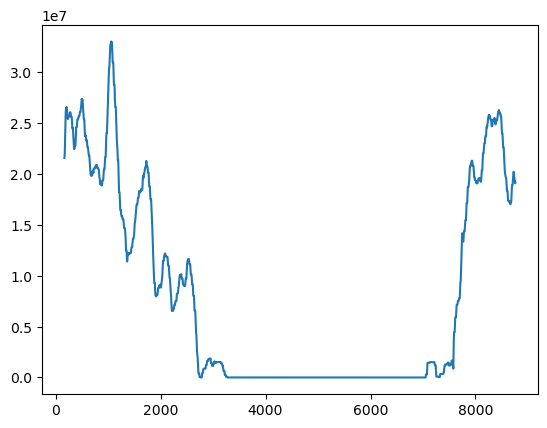

In [958]:
dfmeter['DistrictHeating:Facility [J](TimeStep)'].rolling(168).mean().plot()
heat_GJ_total = dfmeter['DistrictHeating:Facility [J](TimeStep)'][:7500].sum() / 1_000_000_000
heat_kWh_m2 = heat_GJ_total * 277.8 / 2480

print(heat_GJ_total)
print(heat_kWh_m2)

66.27074017950962

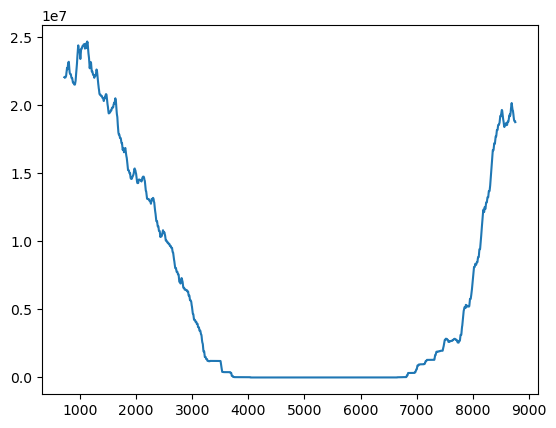

In [678]:
dfmeter['DistrictHeating:Facility [J](TimeStep)'].rolling(720).mean().plot()
dfmeter['DistrictHeating:Facility [J](TimeStep)'].sum() / 1_000_000_000

In [ ]:
import matplotlib.pyplot as plt

# x1 = [2,4,6,8]
# x2 = [3,5,7,9]
# x = [x for x in range(72)]
# y2 = output_df["DistrictHeating:Facility [J](TimeStep)"]
# y2=y4
# y2 = y2.rolling(702, min_periods=1, center=True).mean()

y1 = df["electricity_facility"]
y2 = df["electricity_heating"]
y2 = y2.rolling(24, min_periods=1, center=True).mean()
x = [x for x in range(y2.count())]

plt.figure(figsize=(10,6))
# plt.plot(x,y1)
plt.plot(x,y2)
# plt.plot(x,y3)
# plt.plot(x,y4)
# plt.plot(x, list(reversed(booleanlist_school_active)))

plt.show()

# HTM heating extraction

In [3]:
htm_file = pd.read_html(r"C:\Users\sebas\Documents\GitHub\ClimAIte\out\eplustbl.htm")
# MJ_m2 = myhtm['Annual_Building_Utility_Performance_Summary_for_Entire_Facility']['Site and Source Energy'].iat[0,1]
MJ_m2 = htm_file[0][2][1]
EUI_kWh_m2 = float(MJ_m2) * 0.2777777 #conversion from MJ to kWh
print(MJ_m2)
print(EUI_kWh_m2)

113.18
31.438880086000005


In [15]:
htm_file = pd.read_html(r"C:\Users\sebas\Documents\GitHub\ClimAIte\out\eplustbl.htm")
assert htm_file[4][13][0] == 'District Heating [GJ]', 'Wrong column from .HTM file'
heat_GJ_total = float(htm_file[4][13][1]) #GJ total building 1 year
building_area_m2 = 2480
heat_kWh_m2 = heat_GJ_total * 277.8 / building_area_m2

print(heat_kWh_m2, ' kWh/m2/a for heating')

5.932374193548387  kWh/m2/a for heating


# Temperature outside range

In [961]:
# dfoutcsv = pd.read_csv(r"C:\Users\sebas\Documents\GitHub\ClimAIte\out\eplusout.csv") #, parse_dates=['Date/Time'])
# dfoutcsv = pd.read_csv(r"W:\Insync\GDrive\Main\TU Delft\Thesis\DRL runs 04\Building-InsuBASE-MassBASE\RL24hAllRNN\out\eplusout.csv")
dfoutcsv = pd.read_csv(r"W:\Insync\GDrive\Main\TU Delft\Thesis\DRL runs 05\Building-InsuBASE-MassBASE\RL24hAllRNN\out\eplusout.csv")
# dfoutcsv = pd.read_csv(r"W:\Insync\GDrive\Main\TU Delft\Thesis\DRL runs 04\Building-InsuBASE-MassBASE\RL04hAllRNN\out\eplusout.csv")
# dfoutcsv = pd.read_csv(r"W:\Insync\GDrive\Main\TU Delft\Thesis\DRL runs 04\Building-InsuBASE-MassBASE\RL24hNoSolarRNN\out\eplusout.csv")
# dfoutcsv = pd.read_csv(r"W:\Insync\GDrive\Main\TU Delft\Thesis\DRL runs 04\Building-InsuBASE-MassBASE\RL04hNoSolarRNN\out\eplusout.csv")
# dfoutcsv = pd.read_csv(r"W:\Insync\GDrive\Main\TU Delft\Thesis\DRL runs 04\Building-InsuBASE-MassBASE\RLBaseNoForesight\out\eplusout.csv")
# dfoutcsv = pd.read_csv(r"W:\Insync\GDrive\Main\TU Delft\Thesis\DRL runs 04\Building-InsuBASE-MassBASE\RL04hFlatInput\out\eplusout.csv")
# dfoutcsv['Z1_GROUND_FLOOR:Zone Mean Radiant Temperature [C](Hourly)']#.dropna().plot()
# dfoutcsv['Z2_FIRST_FLOOR:Zone Mean Radiant Temperature [C](Hourly)']#.dropna().plot()

In [1000]:
# creating range sequence of dates
name = 'BaselineEP 43543'
if name == 'BaselineEP':
    dates = pd.date_range('2007-01-01', periods=8760, freq='H')
else:
    dates = pd.date_range('2014-01-01', periods=8760, freq='H')

#creating pandas Series with date index
s = pd.Series(dates)
dfoutcsv['Date/Time'] = s
# dfoutcsv
# s.dt.dayofweek[20:30] # 0-6 Mon-Sun
# dfoutcsv['Date/Time'].dt.dayofweek

count_too_cold = dfoutcsv[(dfoutcsv['Z2_FIRST_FLOOR:Zone Operative Temperature [C](Hourly)'] < 20) &
               (dfoutcsv['Date/Time'].dt.dayofweek < 5) &
               (dfoutcsv['Date/Time'].dt.hour.between(8, 15, inclusive='both')) &
               (dfoutcsv['Date/Time'].dt.dayofyear <= 313)
               ].count()['Z2_FIRST_FLOOR:Zone Operative Temperature [C](Hourly)']

print('Hours too cold: ', count_too_cold)

degree_hours_cold = (20 - dfoutcsv[(dfoutcsv['Z2_FIRST_FLOOR:Zone Operative Temperature [C](Hourly)'] < 20) &
               (dfoutcsv['Date/Time'].dt.dayofweek < 5) &
               (dfoutcsv['Date/Time'].dt.hour.between(8, 15, inclusive='both')) &
               (dfoutcsv['Date/Time'].dt.dayofyear <= 313)
               ]['Z2_FIRST_FLOOR:Zone Operative Temperature [C](Hourly)']).sum()

print('Degree hours cold: ', degree_hours_cold)

count_too_hot = dfoutcsv[(dfoutcsv['Z2_FIRST_FLOOR:Zone Operative Temperature [C](Hourly)'] > 25) &
               (dfoutcsv['Date/Time'].dt.dayofweek < 5) &
               (dfoutcsv['Date/Time'].dt.hour.between(8, 15, inclusive='both'))
               ].count()['Z2_FIRST_FLOOR:Zone Operative Temperature [C](Hourly)']

print('Hours too hot: ', count_too_hot)

degree_hours_hot = (25 - dfoutcsv[(dfoutcsv['Z2_FIRST_FLOOR:Zone Operative Temperature [C](Hourly)'] > 25) &
               (dfoutcsv['Date/Time'].dt.dayofweek < 5) &
               (dfoutcsv['Date/Time'].dt.hour.between(8, 15, inclusive='both')) &
               (dfoutcsv['Date/Time'].dt.dayofyear <= 313)
               ]['Z2_FIRST_FLOOR:Zone Operative Temperature [C](Hourly)']).sum() *-1

print('Degree hours hot: ', degree_hours_hot)

light_on_weekend = dfoutcsv[(dfoutcsv['Z2_FIRST_FLOOR:Zone Lights Electricity Energy [J](Hourly)'] > 0) &
               (dfoutcsv['Date/Time'].dt.dayofweek == 6) 
               ].count()['Date/Time']
print(light_on_weekend)

Hours too cold:  252
Degree hours cold:  58.11380573345653
Hours too hot:  57
Degree hours cold:  13.922753639600657
780


In [911]:
df_too_cold = dfoutcsv[(dfoutcsv['Z2_FIRST_FLOOR:Zone Operative Temperature [C](Hourly)'] < 20) &
            (dfoutcsv['Date/Time'].dt.dayofweek < 5) &
            (dfoutcsv['Date/Time'].dt.hour.between(8, 15, inclusive='both')) &
            (dfoutcsv.index <= 7500)
            ]
df_too_cold
df_too_cold = df_too_cold.sort_values(by=['Z2_FIRST_FLOOR:Zone Operative Temperature [C](Hourly)'])
df_bins = pd.cut(df_too_cold['Z2_FIRST_FLOOR:Zone Operative Temperature [C](Hourly)'], 10)#, labels=[x for x in range(5)])

names = df_bins.unique()
# names.sort()
print(names)
for i in names:
    print(len(df_bins[df_bins == i]))


[(19.074, 19.167], (19.259, 19.352], (19.537, 19.629], (19.629, 19.721], (19.721, 19.814], (19.814, 19.906], (19.906, 19.999]]
Categories (10, interval[float64, right]): [(19.074, 19.167] < (19.167, 19.259] < (19.259, 19.352] < (19.352, 19.444] ... (19.629, 19.721] < (19.721, 19.814] < (19.814, 19.906] < (19.906, 19.999]]
1
1
1
2
5
21
30


In [546]:
dfoutcsv['weekday'] = dfoutcsv['Date/Time'].dt.dayofweek
# dfoutcsv.head()
# dfoutcsv['Date/Time'].dt.dayofweek

In [547]:
dfoutcsv.head()

,Date/Time,Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep),Z1_GROUND_FLOOR:Zone People Total Heating Energy [J](Hourly),Z2_FIRST_FLOOR:Zone People Total Heating Energy [J](Hourly),Z1_GROUND_FLOOR:Zone Lights Electricity Energy [J](Hourly),Z2_FIRST_FLOOR:Zone Lights Electricity Energy [J](Hourly),Z1_GROUND_FLOOR:Zone Electric Equipment Electricity Energy [J](Hourly),Z2_FIRST_FLOOR:Zone Electric Equipment Electricity Energy [J](Hourly),Z1_GROUND_FLOOR:Zone Mean Radiant Temperature [C](Hourly),Z2_FIRST_FLOOR:Zone Mean Radiant Temperature [C](Hourly),...,Z2_FIRST_FLOOR IDEAL LOADS AIR SYSTEM:Zone Ideal Loads Zone Total Heating Energy [J](Hourly),Z2_FIRST_FLOOR IDEAL LOADS AIR SYSTEM:Zone Ideal Loads Zone Total Cooling Energy [J](Hourly),SERVICEHOTWATER_C832CB16..Z2_FIRST_FLOOR:Water Use Equipment Heating Energy [J](Hourly),SERVICEHOTWATER_C832CB16..Z1_GROUND_FLOOR:Water Use Equipment Heating Energy [J](Hourly),SHW WATERHEATER1:Water Heater Electricity Energy [J](Hourly),SHW PUMP1:Pump Electricity Energy [J](Hourly),Electricity:Facility [J](TimeStep),DistrictCooling:Facility [J](TimeStep),DistrictHeating:Facility [J](TimeStep),weekday
0,2007-01-01 00:00:00,3.7,0.0,0.0,0.0,0.0,0.0,0.0,19.247836,19.188954,...,6.068199e+06,0.000000e+00,0.0,0.0,0.000000,0.0,72000.000000,0.0,2.200464e+07,0
1,2007-01-01 01:00:00,3.6,0.0,0.0,0.0,0.0,0.0,0.0,19.149159,19.072734,...,7.134712e+06,1.637090e-09,0.0,0.0,373887.936118,0.0,445880.832247,0.0,2.675933e+07,0
2,2007-01-01 02:00:00,4.0,0.0,0.0,0.0,0.0,0.0,0.0,19.089941,19.005655,...,7.915496e+06,1.637090e-09,0.0,0.0,0.000000,0.0,72000.000000,0.0,2.895100e+07,0
3,2007-01-01 03:00:00,4.2,0.0,0.0,0.0,0.0,0.0,0.0,19.051606,18.963944,...,1.079270e+07,0.000000e+00,0.0,0.0,0.000000,0.0,72000.000000,0.0,3.787104e+07,0
4,2007-01-01 04:00:00,4.2,0.0,0.0,0.0,0.0,0.0,0.0,19.022335,18.932879,...,1.358858e+07,3.274181e-09,0.0,0.0,0.000000,0.0,72000.000000,0.0,4.809901e+07,0


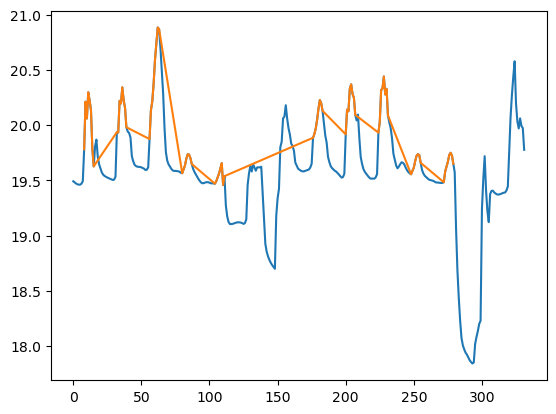

In [548]:
import matplotlib.pyplot as plt
# import numpy as np
dfshort = dfoutcsv[168:500]
rangework = pd.DataFrame(dfshort[(dfshort['Date/Time'].dt.dayofweek < 5) &
               (dfshort['Date/Time'].dt.hour.between(8, 15, inclusive='both'))
               ])   #.count()['Z2_FIRST_FLOOR:Zone Operative Temperature [C](Hourly)'])
rangework.iloc[:, [0]]

x = [x for x in range(dfshort['Date/Time'].count())]
y = dfshort['Z2_FIRST_FLOOR:Zone Operative Temperature [C](Hourly)']
x2 = rangework.index - 168
y2 = rangework['Z2_FIRST_FLOOR:Zone Operative Temperature [C](Hourly)']
plt.plot(x, y)
plt.plot(x2, y2)
# plt.Color(0.1, 0.2, 0.5)
# plt.legend(loc='best')
plt.show()

# rangework

<Axes: >

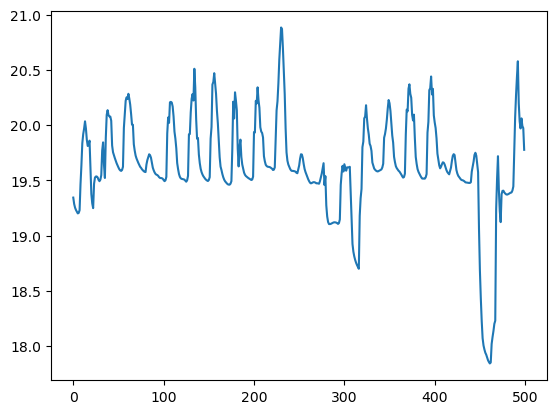

In [549]:
# dfoutcsv['Z2_FIRST_FLOOR:Zone Mean Radiant Temperature [C](Hourly)'][0:500].plot()
# dfoutcsv['Z2_FIRST_FLOOR:Zone Air Temperature [C](TimeStep)'][0:500].plot()
# dfoutcsv['Z2_FIRST_FLOOR:Zone Mean Air Temperature [C](Hourly)'][0:500].plot()
dfoutcsv['Z2_FIRST_FLOOR:Zone Operative Temperature [C](Hourly)'][0:500].plot()

# Make Dataframe like report

In [550]:
base_path = r"W:\Insync\GDrive\Main\TU Delft\Thesis\DRL runs"
availablelist = [x for x in os.listdir(base_path) if 'ing-Insu' in x]
print(availablelist)

['Building-InsuBASE-MassBASE', 'Building-InsuBASE-MassDW', 'Building-InsuBASE-MassUP', 'Building-InsuDW-MassBASE', 'Building-InsuDW-MassDW', 'Building-InsuDW-MassUP', 'Building-InsuUP-MassBASE', 'Building-InsuUP-MassDW', 'Building-InsuUP-MassUP']


In [1093]:
import pandas as pd
import os

column_name = ['Building type name',
               'Insulation',
               'Thermal Mass'
               #'Weather Location'
               #'Baseline EnergyPlus Heating [kWh/m2/a]', #from htm
               #'Baseline EnergyPlus too warm % time > 25C', #from out csv
               #'Baseline EnergyPlus too cold % time < 20C']
]

base_path = r"W:\Insync\GDrive\Main\TU Delft\Thesis\DRL runs 07"
# EPBaseline', 'RLBaseNoForesight', 'RL24hAllRNN', 'RL24hNoSolarRNN', 'RL04hAllRNN', 'RL04hNoSolarRNN', 'RL04hFlatInput'
control_types_list = ['EPBaseline', 'RL24hAllRNN', 'RL04hAllRNN', 'RLBaseNoForesight']#, 'RL24hNoSolarRNN', 'RL04hNoSolarRNN', 'RL04hFlatInput']
control_pretty_names_list = ['Baseline EnergyPlus simple schedule', 'RL 24h Foresight RNN', 'RL 4h Foresight RNN', 'RL No Foresight']#, 'RL 24h Foresight RNN w/o Solar', 'RL 4h Foresight RNN w/o Solar', 'RL 4h Foresight flat inputs']

for name in control_pretty_names_list:
    column_name.append(f'{name} Heating [kWh/m2/a]')
    column_name.append(f'{name} too cold % time < 20C')
    column_name.append(f'{name} too warm % time > 25C')


building_types_list = [ 'Building-InsuBASE-MassBASE',
                        'Building-InsuBASE-MassDW',
                        'Building-InsuBASE-MassUP',
                        'Building-InsuDW-MassBASE',
                        'Building-InsuDW-MassDW',
                        'Building-InsuDW-MassUP',
                        'Building-InsuUP-MassBASE',
                        'Building-InsuUP-MassDW',
                        'Building-InsuUP-MassUP']


building_area_m2 = 2480

rows_combined = []
for builidng_no, unique_building_name in enumerate(building_types_list):
    
    row_in_df = []
    row_in_df.append(unique_building_name)

    if unique_building_name[13] == 'B':
        row_in_df.append('Baseline')
    elif unique_building_name[13] == 'D':
        row_in_df.append('Decreased 50%')
    elif unique_building_name[13] == 'U':
        row_in_df.append('Increased 2x')
    
    if unique_building_name[-1] == 'E':
        row_in_df.append('Baseline')
    elif unique_building_name[-1] == 'W':
        row_in_df.append('Decreased 50%')
    elif unique_building_name[-1] == 'P':
        row_in_df.append('Increased 2x')

    for control_no, unique_control in enumerate(control_types_list):
        htm_path = os.path.join(base_path, unique_building_name, unique_control, 'out', 'eplustbl.htm')
        epluscsv_path = os.path.join(base_path, unique_building_name, unique_control, 'out', 'eplusout.csv')
        meter_path = os.path.join(base_path, unique_building_name, unique_control, 'out', 'eplusmtr.csv')

        dfmeter = pd.read_csv(meter_path)
        heat_GJ_total = dfmeter['DistrictHeating:Facility [J](TimeStep)'][:7500].sum() / 1_000_000_000

        # htm_file = pd.read_html(htm_path)
        # assert htm_file[4][13][0] == 'District Heating [GJ]', 'Wrong column/table from .HTM file'
        # heat_GJ_total = float(htm_file[4][13][1]) #GJ total building 1 year

        heat_kWh_m2 = heat_GJ_total * 277.8 / building_area_m2

        row_in_df.append(heat_kWh_m2)
        print(heat_kWh_m2, ' kWh/m2/a for heating')

        # CSV for temperature ranges
        epluscsv = pd.read_csv(epluscsv_path)

        if unique_control == 'EPBaseline':
            dates = pd.date_range('2007-01-01', periods=8760, freq='H')
        else:
            dates = pd.date_range('2014-01-01', periods=8760, freq='H')

        #creating pandas Series with date index
        s = pd.Series(dates)
        epluscsv['Date/Time'] = s # s.dt.dayofweek # 0-6 Mon-Sun

        count_too_cold = epluscsv[(epluscsv['Z2_FIRST_FLOOR:Zone Operative Temperature [C](Hourly)'] < 20) &
                    (epluscsv['Date/Time'].dt.dayofweek < 5) &
                    (epluscsv['Date/Time'].dt.hour.between(8, 15, inclusive='both')) &
                    (epluscsv.index <= 7500)
                    ].count()['Z2_FIRST_FLOOR:Zone Operative Temperature [C](Hourly)']
        row_in_df.append(count_too_cold)
        print(count_too_cold, ' days too cold')

        count_too_warm = epluscsv[(epluscsv['Z2_FIRST_FLOOR:Zone Operative Temperature [C](Hourly)'] > 25) &
                    (epluscsv['Date/Time'].dt.dayofweek < 5) &
                    (epluscsv['Date/Time'].dt.hour.between(8, 15, inclusive='both')) &
                    (epluscsv.index <= 7500)
                    ].count()['Z2_FIRST_FLOOR:Zone Operative Temperature [C](Hourly)']
        row_in_df.append(count_too_warm)
        print(count_too_warm, ' days too warm')

        # degree_hours_cold = (20 - epluscsv[(epluscsv['Z2_FIRST_FLOOR:Zone Operative Temperature [C](Hourly)'] < 20) &
        #        (epluscsv['Date/Time'].dt.dayofweek < 5) &
        #        (epluscsv['Date/Time'].dt.hour.between(8, 15, inclusive='both')) &
        #        (epluscsv['Date/Time'].dt.dayofyear <= 313)
        #        ]['Z2_FIRST_FLOOR:Zone Operative Temperature [C](Hourly)']).sum()

        # print('Degree hours cold: ', degree_hours_cold)
        # row_in_df.append(degree_hours_cold)

        # degree_hours_hot = (25 - epluscsv[(epluscsv['Z2_FIRST_FLOOR:Zone Operative Temperature [C](Hourly)'] > 25) &
        #        (epluscsv['Date/Time'].dt.dayofweek < 5) &
        #        (epluscsv['Date/Time'].dt.hour.between(8, 15, inclusive='both')) &
        #        (epluscsv['Date/Time'].dt.dayofyear <= 313)
        #        ]['Z2_FIRST_FLOOR:Zone Operative Temperature [C](Hourly)']).sum() *-1

        # print('Degree hours hot: ', degree_hours_hot)
        # row_in_df.append(degree_hours_hot)




    rows_combined.append(row_in_df)

print(rows_combined)

5.401998304565982  kWh/m2/a for heating
58  days too cold
95  days too warm
5.253007911708569  kWh/m2/a for heating
82  days too cold
105  days too warm
5.304809168323728  kWh/m2/a for heating
71  days too cold
105  days too warm
5.344124875754652  kWh/m2/a for heating
60  days too cold
105  days too warm
5.576962669577161  kWh/m2/a for heating
67  days too cold
117  days too warm
5.48612313387633  kWh/m2/a for heating
77  days too cold
119  days too warm
5.466091487627168  kWh/m2/a for heating
72  days too cold
119  days too warm
5.505482245537776  kWh/m2/a for heating
73  days too cold
119  days too warm
5.141373380948218  kWh/m2/a for heating
59  days too cold
67  days too warm
5.064465059827535  kWh/m2/a for heating
53  days too cold
73  days too warm
5.099352647991185  kWh/m2/a for heating
55  days too cold
73  days too warm
5.09965440926155  kWh/m2/a for heating
66  days too cold
73  days too warm
17.94789535926195  kWh/m2/a for heating
465  days too cold
115  days too warm
17.23

In [1094]:
df = pd.DataFrame(rows_combined, columns=column_name)
df

,Building type name,Insulation,Thermal Mass,Baseline EnergyPlus simple schedule Heating [kWh/m2/a],Baseline EnergyPlus simple schedule too cold % time < 20C,Baseline EnergyPlus simple schedule too warm % time > 25C,RL 24h Foresight RNN Heating [kWh/m2/a],RL 24h Foresight RNN too cold % time < 20C,RL 24h Foresight RNN too warm % time > 25C,RL 4h Foresight RNN Heating [kWh/m2/a],RL 4h Foresight RNN too cold % time < 20C,RL 4h Foresight RNN too warm % time > 25C,RL No Foresight Heating [kWh/m2/a],RL No Foresight too cold % time < 20C,RL No Foresight too warm % time > 25C
0,Building-InsuBASE-MassBASE,Baseline,Baseline,5.401998,58,95,5.253008,82,105,5.304809,71,105,5.344125,60,105
1,Building-InsuBASE-MassDW,Baseline,Decreased 50%,5.576963,67,117,5.486123,77,119,5.466091,72,119,5.505482,73,119
2,Building-InsuBASE-MassUP,Baseline,Increased 2x,5.141373,59,67,5.064465,53,73,5.099353,55,73,5.099654,66,73
3,Building-InsuDW-MassBASE,Decreased 50%,Baseline,17.947895,465,115,17.233694,465,117,16.748451,561,113,16.633997,567,113
4,Building-InsuDW-MassDW,Decreased 50%,Decreased 50%,18.233204,455,140,17.344311,459,144,17.933245,467,144,16.778034,561,134
5,Building-InsuDW-MassUP,Decreased 50%,Increased 2x,17.511681,467,67,15.906893,617,66,16.436329,532,68,17.493236,455,68
6,Building-InsuUP-MassBASE,Increased 2x,Baseline,2.603222,3,114,2.575863,2,124,2.587665,2,126,2.584400,2,127
7,Building-InsuUP-MassDW,Increased 2x,Decreased 50%,2.702444,2,159,2.668934,5,170,2.701167,4,169,2.692529,4,170
8,Building-InsuUP-MassUP,Increased 2x,Increased 2x,2.313992,3,76,2.368445,14,80,2.429115,1,80,2.426681,1,80


Improvement notes.

In emspy, use Operative Temperature instead of Air temperature.
Further tests, train for longer. Larger NN. Even more replay memory, daily perhaps after samples >4000.
Train until 2010 or 2011? nope
Change reward to 10x temperature priority.

Smaller hidden network size but one more layer? Down to 100, most sources say not bigger than in/output layer. Deeper networks are necessary for non-linear cases. So perhaps slightly deeper is better.


Updates for Version 2
Network hidden layers from 400,400,400 to 80 x 5
Daily experience replay at 23:00, instead of only on Sundays
Using Zone Operative Temperature instead of Air Temperature
Reward change, heating is /10 less important, in order to prioritize comfort.

Updates for Version 3
Train for 7 years instead of 3 years. (2007-2014)
Change activation function from Relu to Gelu
Epsilon exploration, from first 7000 to 12000 hours. Also, the random int increased from 12000 to 20000.
Adjust reward minimum to 20.5 self.work_hours_heating_setpoint to nudge it, make elec divisor 7

Version 4
Implemented RNN 'correctly' - rnn lists were not reversed and hence wrong
Reduced NN length
Reset Epsilon to 7k and 12k

Version 5
Results somewhat useful (despite rnn error)
Reversed RNN inputs (mistake in V4)
Longer training times did not really help

Version 6
Rerun all

V7
Reduce action
Additional inputs to make Markovian


Actions:



Additional inputs:

Input additional info for state. Air temp, radiant temp, humidity, electricity, people heating, solar window gain, weekday, weekend boolean, time of day, heat storage, 


Output:Variable,*,Surface Heat Storage Rate per Area,hourly; !- Zone Average [W/m2]
Output:Variable,*,Surface Heat Storage Energy,hourly; !- Zone Sum [J]

Set up custom DF output, either from BCA or manual list
Investigate custom DF outputs for dates in multiyear simulation


Input additional state inputs, that are still realistic like RH, more temperatures and weekday count and weekend boolean, heating setpoint, window open boolean, 






# Make graphs like lit research in report

In [1095]:
# x-axis is control: Insulation (and mass for dampening)
# y-axis is potential: Mass and solar
# Size of spheres is relation to saving from baseline.
# There can be one graph for each RL compared to either of the 2 baselines.

In [1096]:
# Graph or calculate improvement % from baseline
list_of_heat = [x for x in column_name if 'kWh' in x]
print(list_of_heat)
base = list_of_heat[0]
the_rest = list_of_heat[1:]
print(the_rest)
df_improvement = df.copy(deep=True)

for each in the_rest:
    each_red = each[:-11]
    df_improvement[f'{each_red} % saving'] = (df_improvement[f'{base}'] - df_improvement[f'{each}']) / df_improvement[f'{base}']

['Baseline EnergyPlus simple schedule Heating [kWh/m2/a]', 'RL 24h Foresight RNN Heating [kWh/m2/a]', 'RL 4h Foresight RNN Heating [kWh/m2/a]', 'RL No Foresight Heating [kWh/m2/a]']
['RL 24h Foresight RNN Heating [kWh/m2/a]', 'RL 4h Foresight RNN Heating [kWh/m2/a]', 'RL No Foresight Heating [kWh/m2/a]']


In [1097]:
# create grid
list_of_saving = [x for x in df_improvement.columns if 'saving' in x]
mini_columns = ['Insulation','Thermal Mass'] + list_of_saving
df_mini = df_improvement[mini_columns]
df_mini['Insulation'] = df_mini['Insulation'].replace(['Baseline', 'Decreased 50%', 'Increased 2x'],[1, 0.5, 2])
df_mini['Thermal Mass'] = df_mini['Thermal Mass'].replace(['Baseline', 'Decreased 50%', 'Increased 2x'],[1, 0.5, 2])
df_mini

C:\Users\sebas\AppData\Local\Temp\ipykernel_14496\3121592374.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mini['Insulation'] = df_mini['Insulation'].replace(['Baseline', 'Decreased 50%', 'Increased 2x'],[1, 0.5, 2])
C:\Users\sebas\AppData\Local\Temp\ipykernel_14496\3121592374.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mini['Thermal Mass'] = df_mini['Thermal Mass'].replace(['Baseline', 'Decreased 50%', 'Increased 2x'],[1, 0.5, 2])


,Insulation,Thermal Mass,RL 24h Foresight RNN Heating % saving,RL 4h Foresight RNN Heating % saving,RL No Foresight Heating % saving
0,1.0,1.0,0.027581,0.017991,0.010713
1,1.0,0.5,0.016288,0.019880,0.012817
2,1.0,2.0,0.014959,0.008173,0.008114
3,0.5,1.0,0.039793,0.066829,0.073206
4,0.5,0.5,0.048751,0.016451,0.079809
5,0.5,2.0,0.091641,0.061408,0.001053
6,2.0,1.0,0.010510,0.005976,0.007230
7,2.0,0.5,0.012400,0.000473,0.003669
8,2.0,2.0,-0.023532,-0.049751,-0.048699


<Axes: >

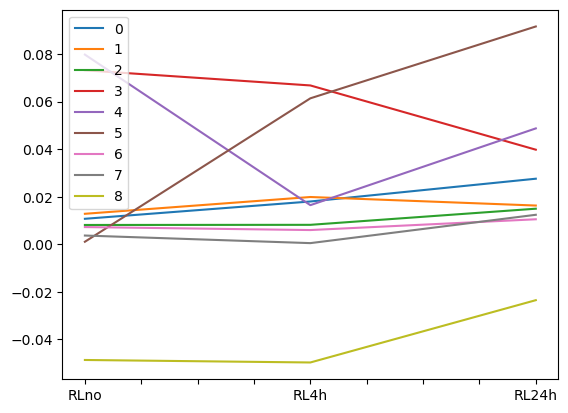

In [1098]:
newlist = []
for row in range(df['Insulation'].count()):
    rowlist = []
    for control in list_of_saving:
        rowlist.append(df_mini.iloc[row][control])
    # rowlist = rowlist[0] + rowlist[2] + rowlist[1]
    newlist.append(rowlist)
dert = pd.DataFrame(newlist)
dertorg = pd.DataFrame()
dertorg['RLno'] = dert[2]
dertorg['RL4h'] = dert[1]
dertorg['RL24h'] = dert[0]
dertorg.T.plot()

In [1099]:
dert

,0,1,2
0,0.027581,0.017991,0.010713
1,0.016288,0.019880,0.012817
2,0.014959,0.008173,0.008114
3,0.039793,0.066829,0.073206
4,0.048751,0.016451,0.079809
5,0.091641,0.061408,0.001053
6,0.010510,0.005976,0.007230
7,0.012400,0.000473,0.003669
8,-0.023532,-0.049751,-0.048699


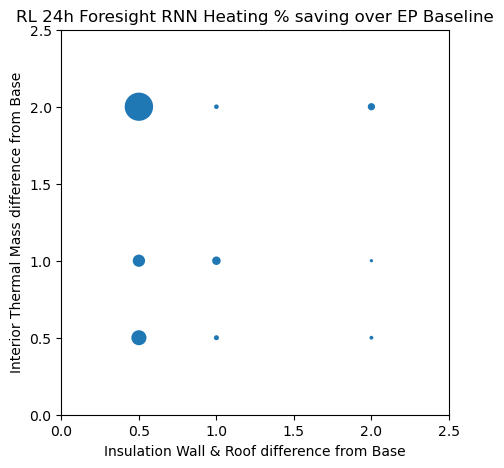

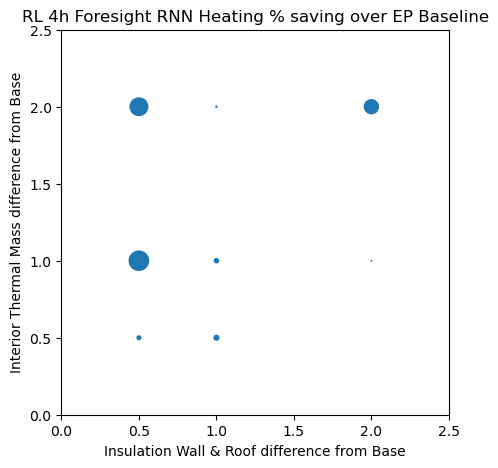

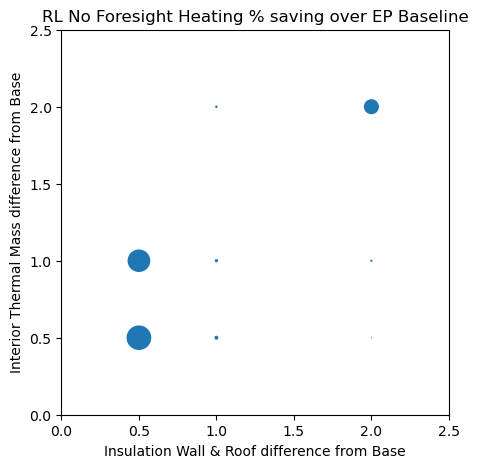

In [1100]:
import matplotlib.pyplot as plt

for control in list_of_saving:
    circle_list = []
    fig, ax = plt.subplots(figsize=(5,5))
    # plt.figure(figsize=(10,10))
    plt.xlim([0,2.5])
    plt.ylim([0,2.5])
    plt.title(f'{control} over EP Baseline')
    plt.xlabel('Insulation Wall & Roof difference from Base')
    plt.ylabel('Interior Thermal Mass difference from Base')
    for row in range(df_mini['Insulation'].count()):
        circle = plt.Circle((df_mini.iloc[row]['Insulation'], df_mini.iloc[row]['Thermal Mass']), df_mini.iloc[row][control])
        ax.add_patch(circle)
        # circle_list.append(circle)


# Week by Week

### Investigate week by week saving for networks. Using HVAC total energy or Meter energy as previously above. This may reveal which season has best savings.
Graph of week by week savings and temperatures


### Make histograms of temperatures indoors